In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [197]:
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [199]:
client_df=pd.read_csv("client_data (1).csv")
price_df=pd.read_csv("price_data (1).csv")

In [200]:
pd.set_option("display.max_columns",None)

In [201]:
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0

In [202]:
client_df.shape

(14606, 26)

In [203]:
client_df.tail()

id                     channel_sales  \
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
14601     32270         47940                0  2012-05-24  2016-05-08   
14602      7223             0              181  2012-08-27  2016-08-27   
14603      1844             0              179  2012-02-08  2016-02-07   
14604       131             0                0  2012-08-30  2016-08-30   
14605      8730             0                0  2009-12-18  2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
14601      2015-05-08   2014-05-26            4648.01                   0   
14602      2012-08-27   2015-08-28             631.69                 181   
14603      2012-02-08   2015-02-09             190.39                 179   
14604      2012-08-30   2015-08-31              19.34                   0   
14605      2009-12-18   2015-12-21             762.41                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
14601                       0.0                    18.57   
14602                       0.0                   144.03   
14603                       0.0                   129.60   
14604                       0.0                     7.18   
14605                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
14601                        0.138305                    0.000000   
14602                        0.100167                    0.091892   
14603                        0.116900                    0.100015   
14604                        0.145711                    0.000000   
14605                        0.167086                    0.088454   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
14601                    44.311378       t      0.00                 27.88   
14602                    58.995952       f     15.94                  0.00   
14603                    40.606701       f     18.05                 39.84   
14604                    44.311378       f      0.00                 13.08   
14605                    45.311378       f      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
14601               27.88            2      381.77                4   
14602                0.00            1       90.34                3   
14603               39.84            1       20.38                4   
14604               13.08            1        0.96                3   
14605               11.84            1       96.34                6   

                              origin_up  pow_max  churn  
14601  lxidpiddsbxsbosboudacockeimpuepw   15.000      0  
14602  lxidpiddsbxsbosboudacockeimpuepw    6.000      1  
14603  lxidpiddsbxsbosboudacockeimpuepw   15.935      1  
14604  lxidpiddsbxsbosboudacockeimpuepw   11.000      0  
14605  ldkssxwpmemidmecebumciepifcamkci   10.392      0

In [204]:
price_df.head(40)

id  price_date  price_off_peak_var  \
0   038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1   038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2   038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3   038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4   038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
5   038af19179925da21a25619c5a24b745  2015-06-01            0.149626   
6   038af19179925da21a25619c5a24b745  2015-07-01            0.150321   
7   038af19179925da21a25619c5a24b745  2015-08-01            0.145859   
8   038af19179925da21a25619c5a24b745  2015-09-01            0.145859   
9   038af19179925da21a25619c5a24b745  2015-10-01            0.145859   
10  038af19179925da21a25619c5a24b745  2015-11-01            0.145859   
11  038af19179925da21a25619c5a24b745  2015-12-01            0.145859   
12  31f2ce549924679a3cbb2d128ae9ea43  2015-01-01            0.125976   
13  31f2ce549924679a3cbb2d128ae9ea43  2015-02-01            0.125976   
14  31f2ce549924679a3cbb2d128ae9ea43  2015-03-01            0.125976   
15  31f2ce549924679a3cbb2d128ae9ea43  2015-04-01            0.125976   
16  31f2ce549924679a3cbb2d128ae9ea43  2015-05-01            0.124815   
17  31f2ce549924679a3cbb2d128ae9ea43  2015-06-01            0.126916   
18  31f2ce549924679a3cbb2d128ae9ea43  2015-07-01            0.126916   
19  31f2ce549924679a3cbb2d128ae9ea43  2015-08-01            0.118755   
20  31f2ce549924679a3cbb2d128ae9ea43  2015-09-01            0.118755   
21  31f2ce549924679a3cbb2d128ae9ea43  2015-10-01            0.118755   
22  31f2ce549924679a3cbb2d128ae9ea43  2015-11-01            0.118755   
23  31f2ce549924679a3cbb2d128ae9ea43  2015-12-01            0.118755   
24  36b6352b4656216bfdb96f01e9a94b4e  2015-01-01            0.123086   
25  36b6352b4656216bfdb96f01e9a94b4e  2015-02-01            0.123086   
26  36b6352b4656216bfdb96f01e9a94b4e  2015-03-01            0.123086   
27  36b6352b4656216bfdb96f01e9a94b4e  2015-04-01            0.123086   
28  36b6352b4656216bfdb96f01e9a94b4e  2015-05-01            0.123086   
29  36b6352b4656216bfdb96f01e9a94b4e  2015-06-01            0.123086   
30  36b6352b4656216bfdb96f01e9a94b4e  2015-07-01            0.123086   
31  36b6352b4656216bfdb96f01e9a94b4e  2015-08-01            0.113068   
32  36b6352b4656216bfdb96f01e9a94b4e  2015-09-01            0.113068   
33  36b6352b4656216bfdb96f01e9a94b4e  2015-10-01            0.113068   
34  36b6352b4656216bfdb96f01e9a94b4e  2015-11-01            0.113068   
35  36b6352b4656216bfdb96f01e9a94b4e  2015-12-01            0.113068   
36  48f3e6e86f7a8656b2c6b6ce2763055e  2015-01-01            0.144431   
37  48f3e6e86f7a8656b2c6b6ce2763055e  2015-02-01            0.144431   
38  48f3e6e86f7a8656b2c6b6ce2763055e  2015-03-01            0.144431   
39  48f3e6e86f7a8656b2c6b6ce2763055e  2015-04-01            0.148405   

    price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0         0.000000            0.000000           44.266931        0.000000   
1         0.000000            0.000000           44.266931        0.000000   
2         0.000000            0.000000           44.266931        0.000000   
3         0.000000            0.000000           44.266931        0.000000   
4         0.000000            0.000000           44.266931        0.000000   
5         0.000000            0.000000           44.266930        0.000000   
6         0.000000            0.000000           44.444710        0.000000   
7         0.000000            0.000000           44.444710        0.000000   
8         0.000000            0.000000           44.444710        0.000000   
9         0.000000            0.000000           44.444710        0.000000   
10        0.000000            0.000000           44.444710        0.000000   
11        0.000000            0.000000           44.444710        0.000000   
12        0.103395            0.071536           40.565969       24

In [205]:
price_df.shape

(193002, 8)

In [206]:
price_df.tail()

id  price_date  price_off_peak_var  \
192997  16f51cdc2baa19af0b940ee1b3dd17d5  2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5  2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5  2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5  2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5  2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
192997        24.43733           16.291555  
192998        24.43733           16.291555  
192999        24.43733           16.291555  
193000        24.43733           16.291555  
193001        24.43733           16.291555

# Descriptive Statistics
# Identify Datatypes

In [208]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [209]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [210]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [211]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

# Data Visualization

In [213]:
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_="upper right"):
    
    ax=dataframe.plot(kind="bar",stacked=True,figsize=size_,rot=rot_,title=title_)
   
    annotate_stacked_bars(ax,textsize=14)
    
    plt.legend(["Retention","Churn"], loc=legend_)
    plt.ylabel('Company base (%)')
   # annotate_stacked_bars(ax,textsize=14)
    plt.show()
   
    
def annotate_stacked_bars(ax,pad=0.99,colour="white",textsize=13):
    for p in ax.patches:
        value=str(round(p.get_height(),1))
        if value==0:
            continue
        ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize)




# Churn

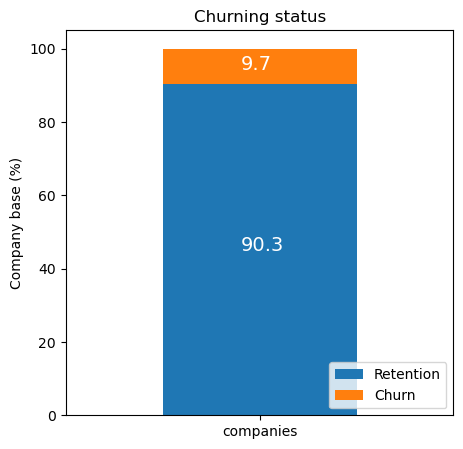

In [215]:
churn=client_df[['id','churn']]
churn.columns=['companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100
plot_stacked_bars(churn_percentage.transpose(),"Churning status",(5,5),legend_="lower right")

About 10% of the total customers have churned

# Consumption

In [218]:

consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [219]:
def plot_distribution(dataframe,column,ax,bins_=50):
    temp=pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],"Churn":dataframe[dataframe["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

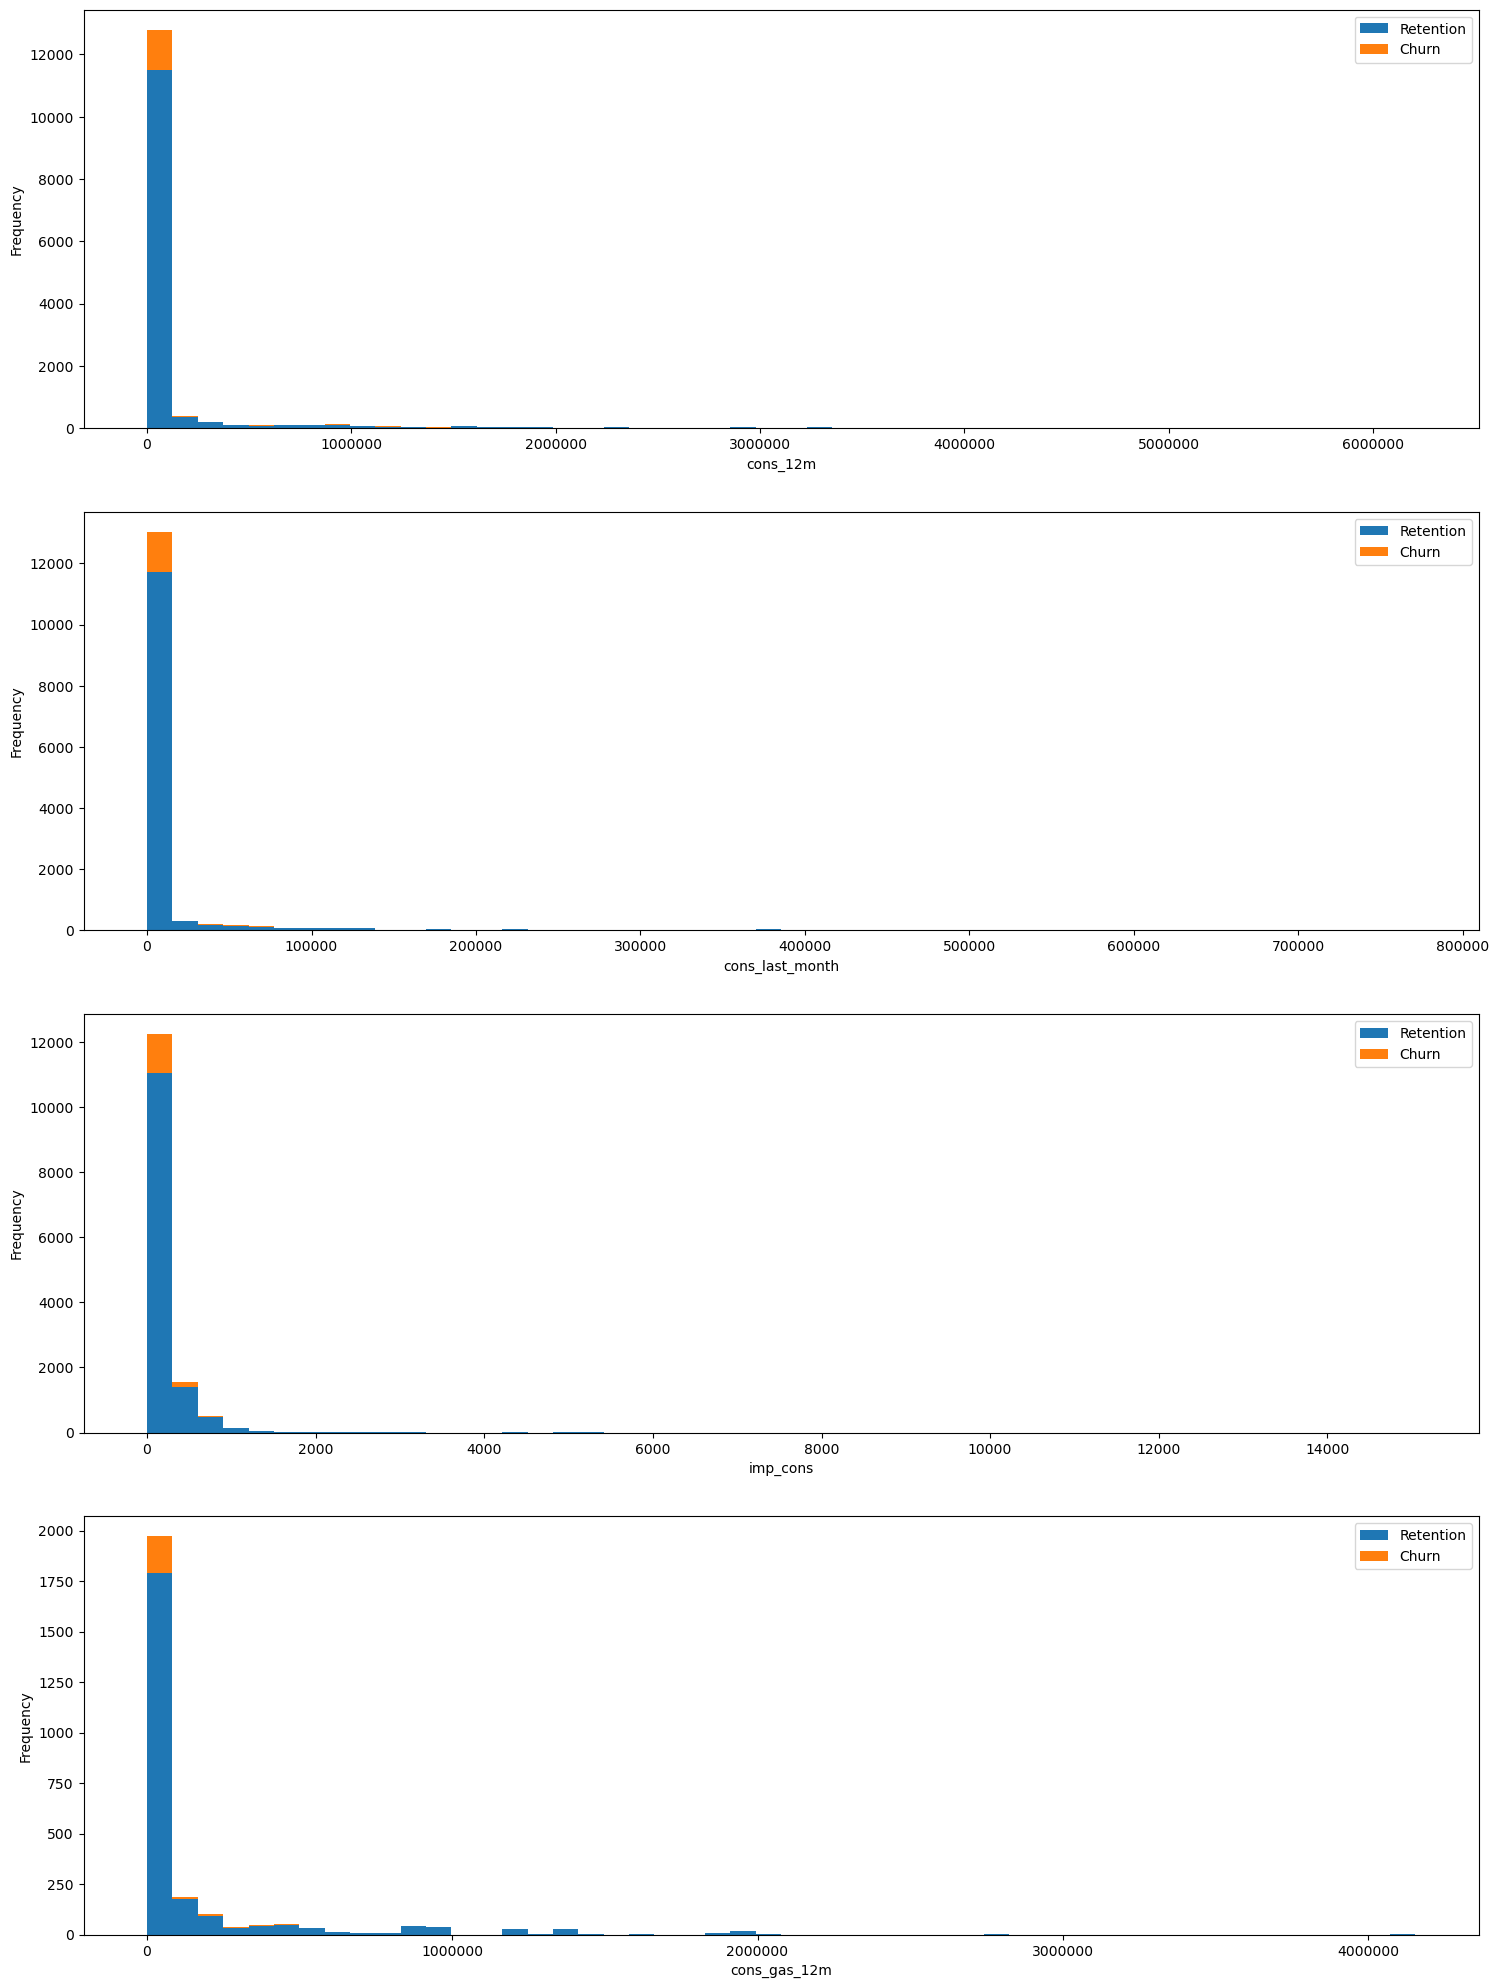

In [220]:
fig, axs =plt.subplots(nrows=4,figsize=(18,25))


plot_distribution(consumption,'cons_12m',axs[0])
plot_distribution(consumption,'cons_last_month',axs[1])
plot_distribution(consumption,'imp_cons',axs[2])
plot_distribution(consumption[consumption['has_gas']== 't'],'cons_gas_12m',axs[3])


The consumption data is highly positively skewed

# Channel sales vs Churn

In [223]:
channel=client_df[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

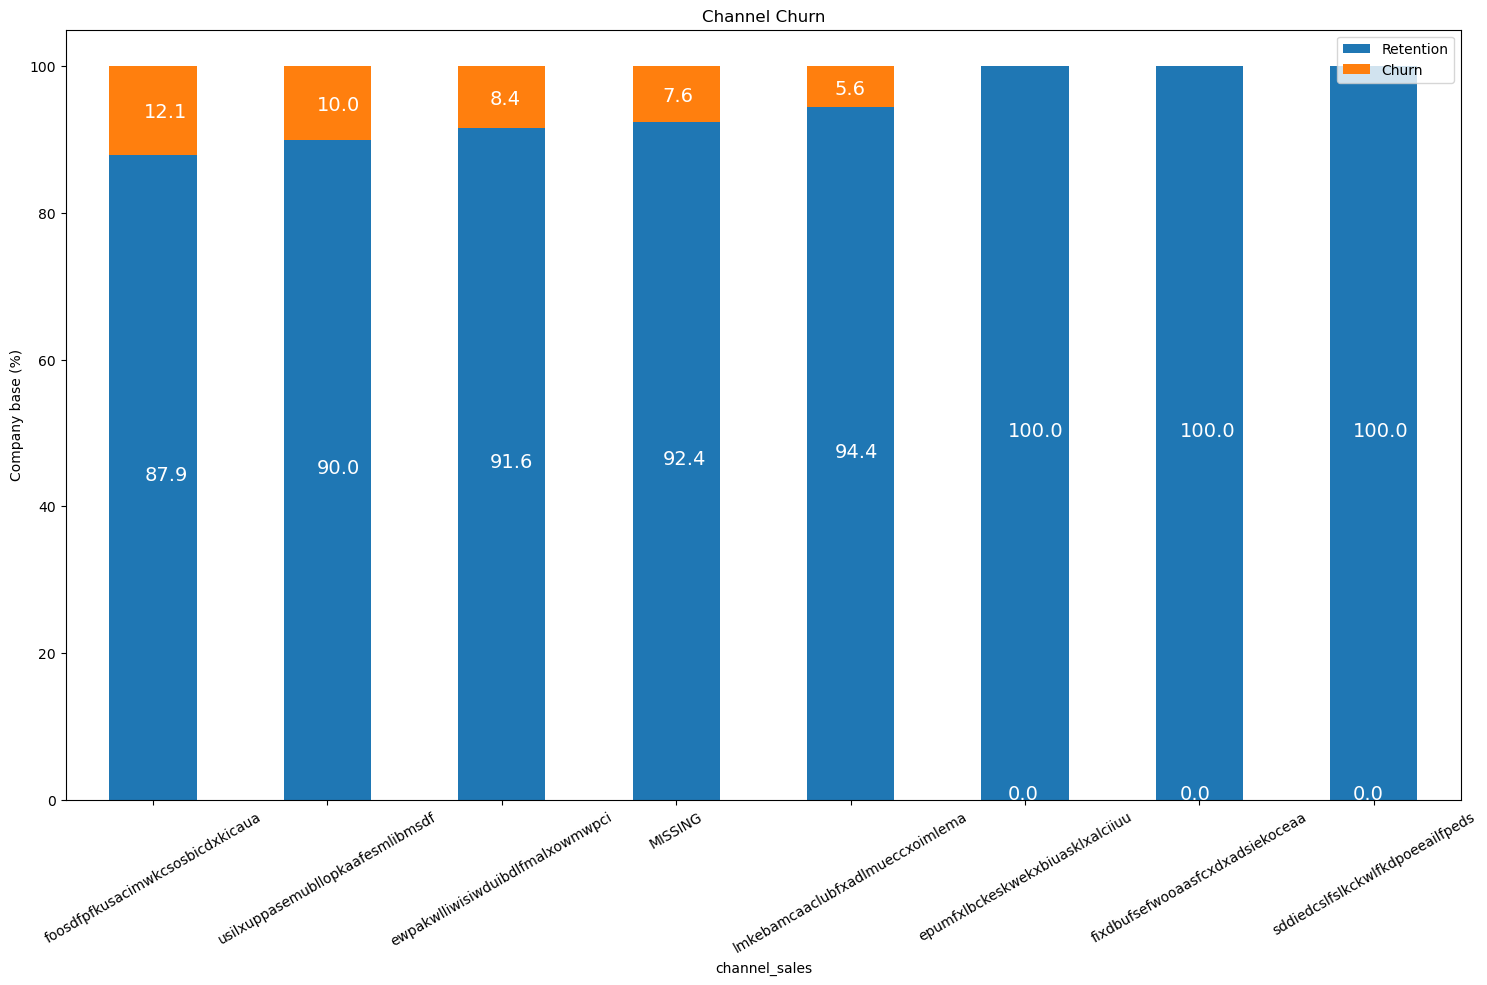

In [224]:
plot_stacked_bars(channel_churn,"Channel Churn",rot_=30)

In [225]:
print (channel_churn)

churn                                      0          1
channel_sales                                          
foosdfpfkusacimwkcsosbicdxkicaua   87.859046  12.140954
usilxuppasemubllopkaafesmlibmsdf   89.963636  10.036364
ewpakwlliwisiwduibdlfmalxowmwpci   91.601344   8.398656
MISSING                            92.402685   7.597315
lmkebamcaaclubfxadlmueccxoimlema   94.411286   5.588714
epumfxlbckeskwekxbiuasklxalciiuu  100.000000   0.000000
fixdbufsefwooaasfcxdxadsiekoceaa  100.000000   0.000000
sddiedcslfslkckwlfkdpoeeailfpeds  100.000000   0.000000


In [226]:
client_df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

# Handling Outliers on Consumption

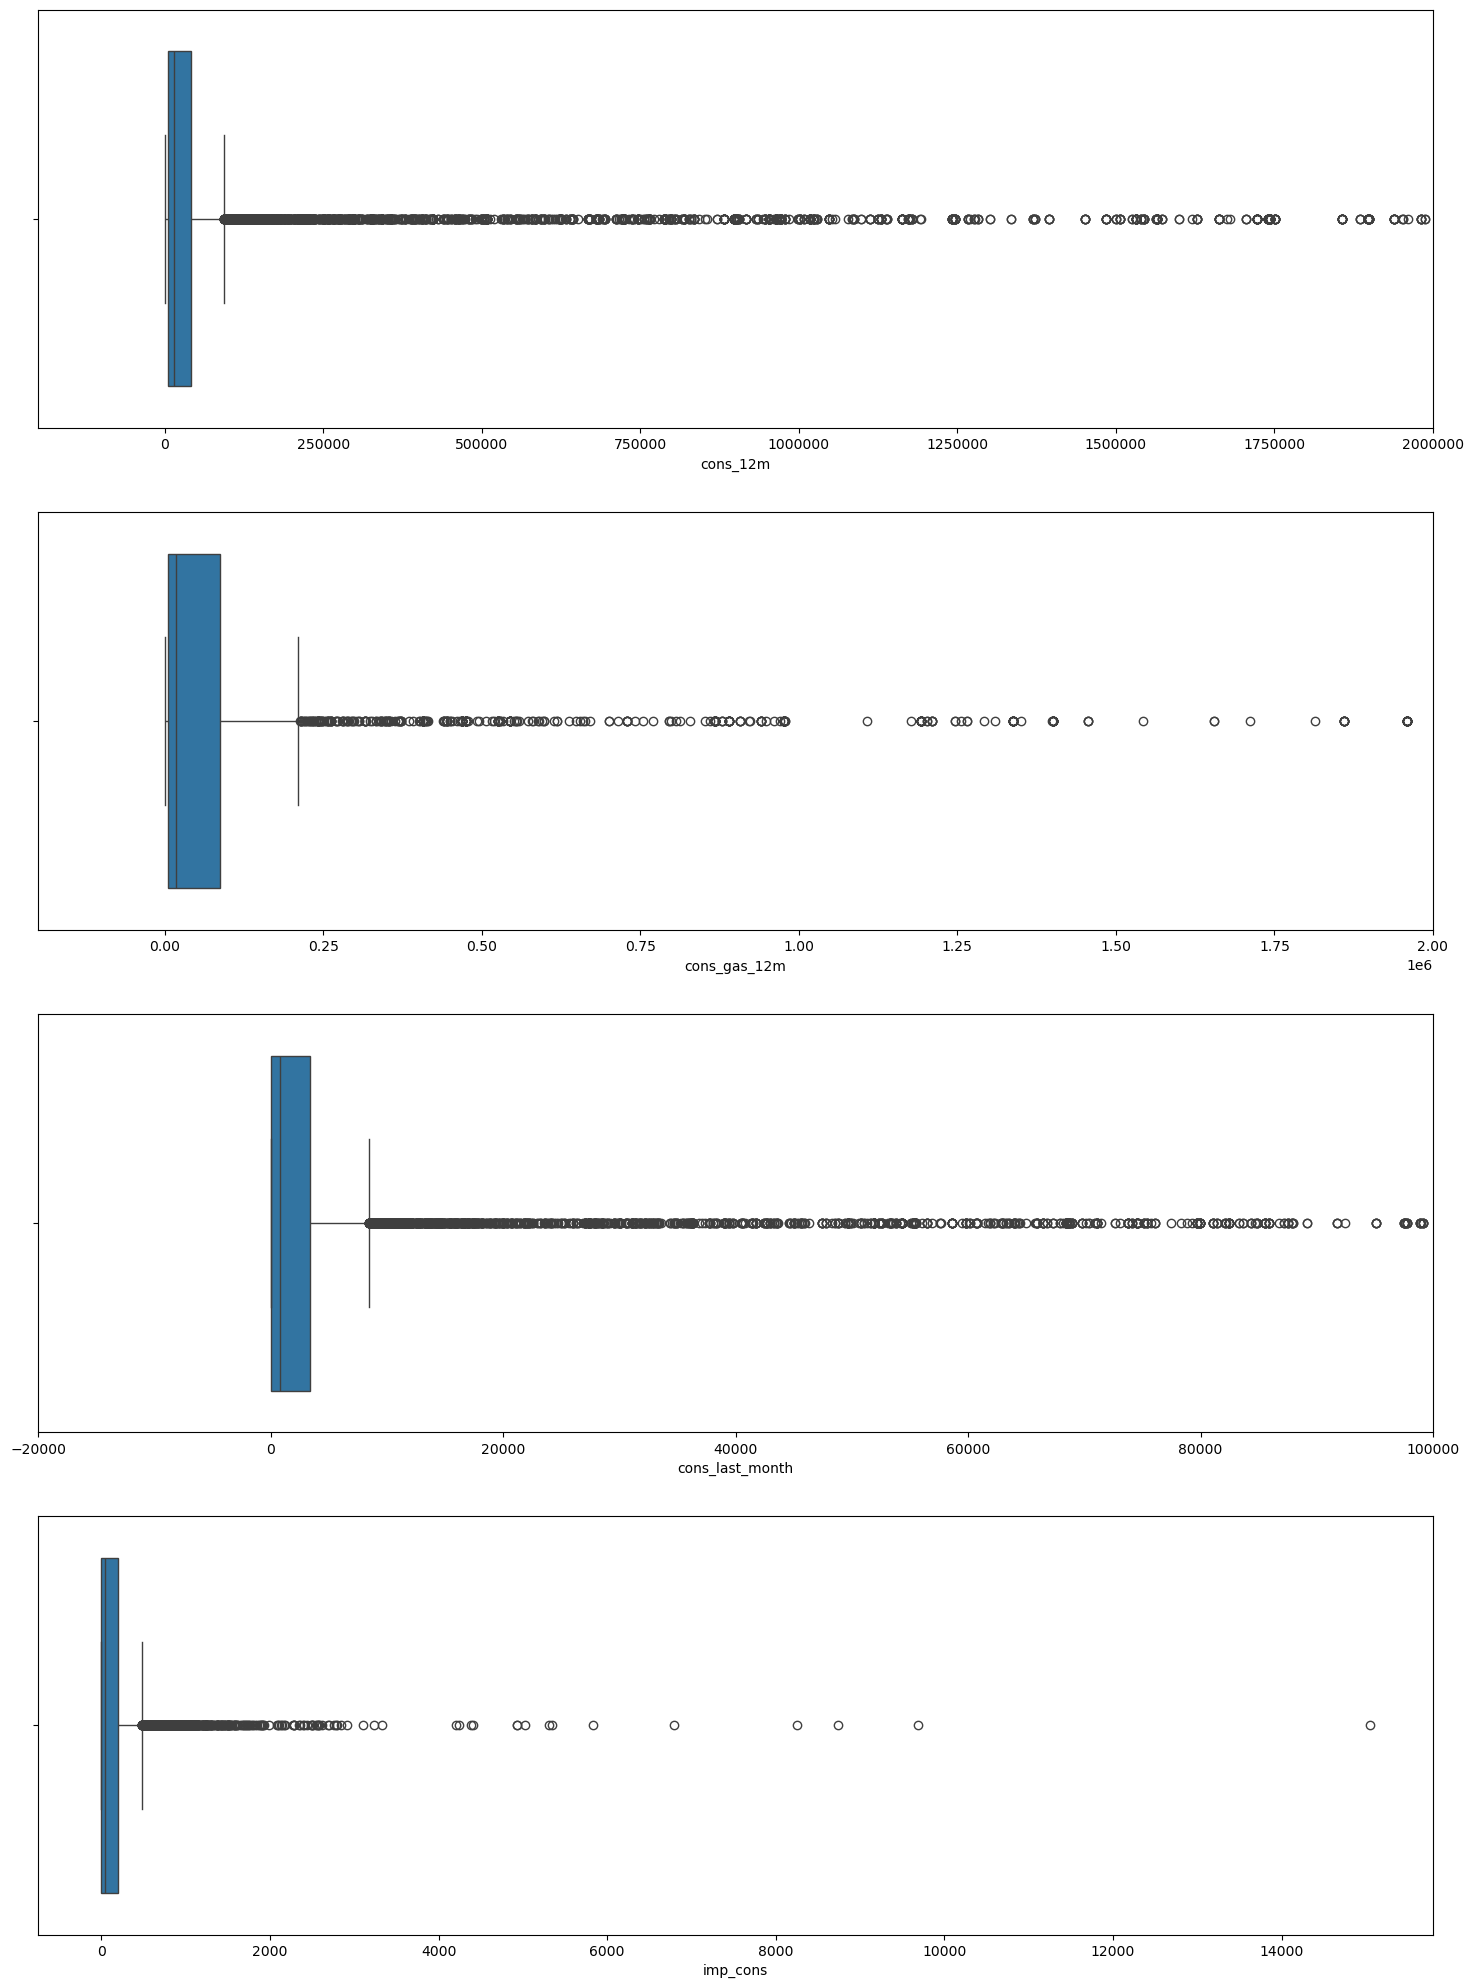

In [228]:
fig, axs =plt.subplots(nrows=4,figsize=(18,25))

sns.boxplot(consumption["cons_12m"],orient='h',ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"]=="t"]["cons_gas_12m"],orient='h',ax=axs[1])
sns.boxplot(consumption["cons_last_month"],orient='h',ax=axs[2])
sns.boxplot(consumption["imp_cons"],orient='h',ax=axs[3])

for ax in axs:
    
    ax.ticklabel_format(style='plain', axis='x')
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)

    plt.show()

Forcast Energy

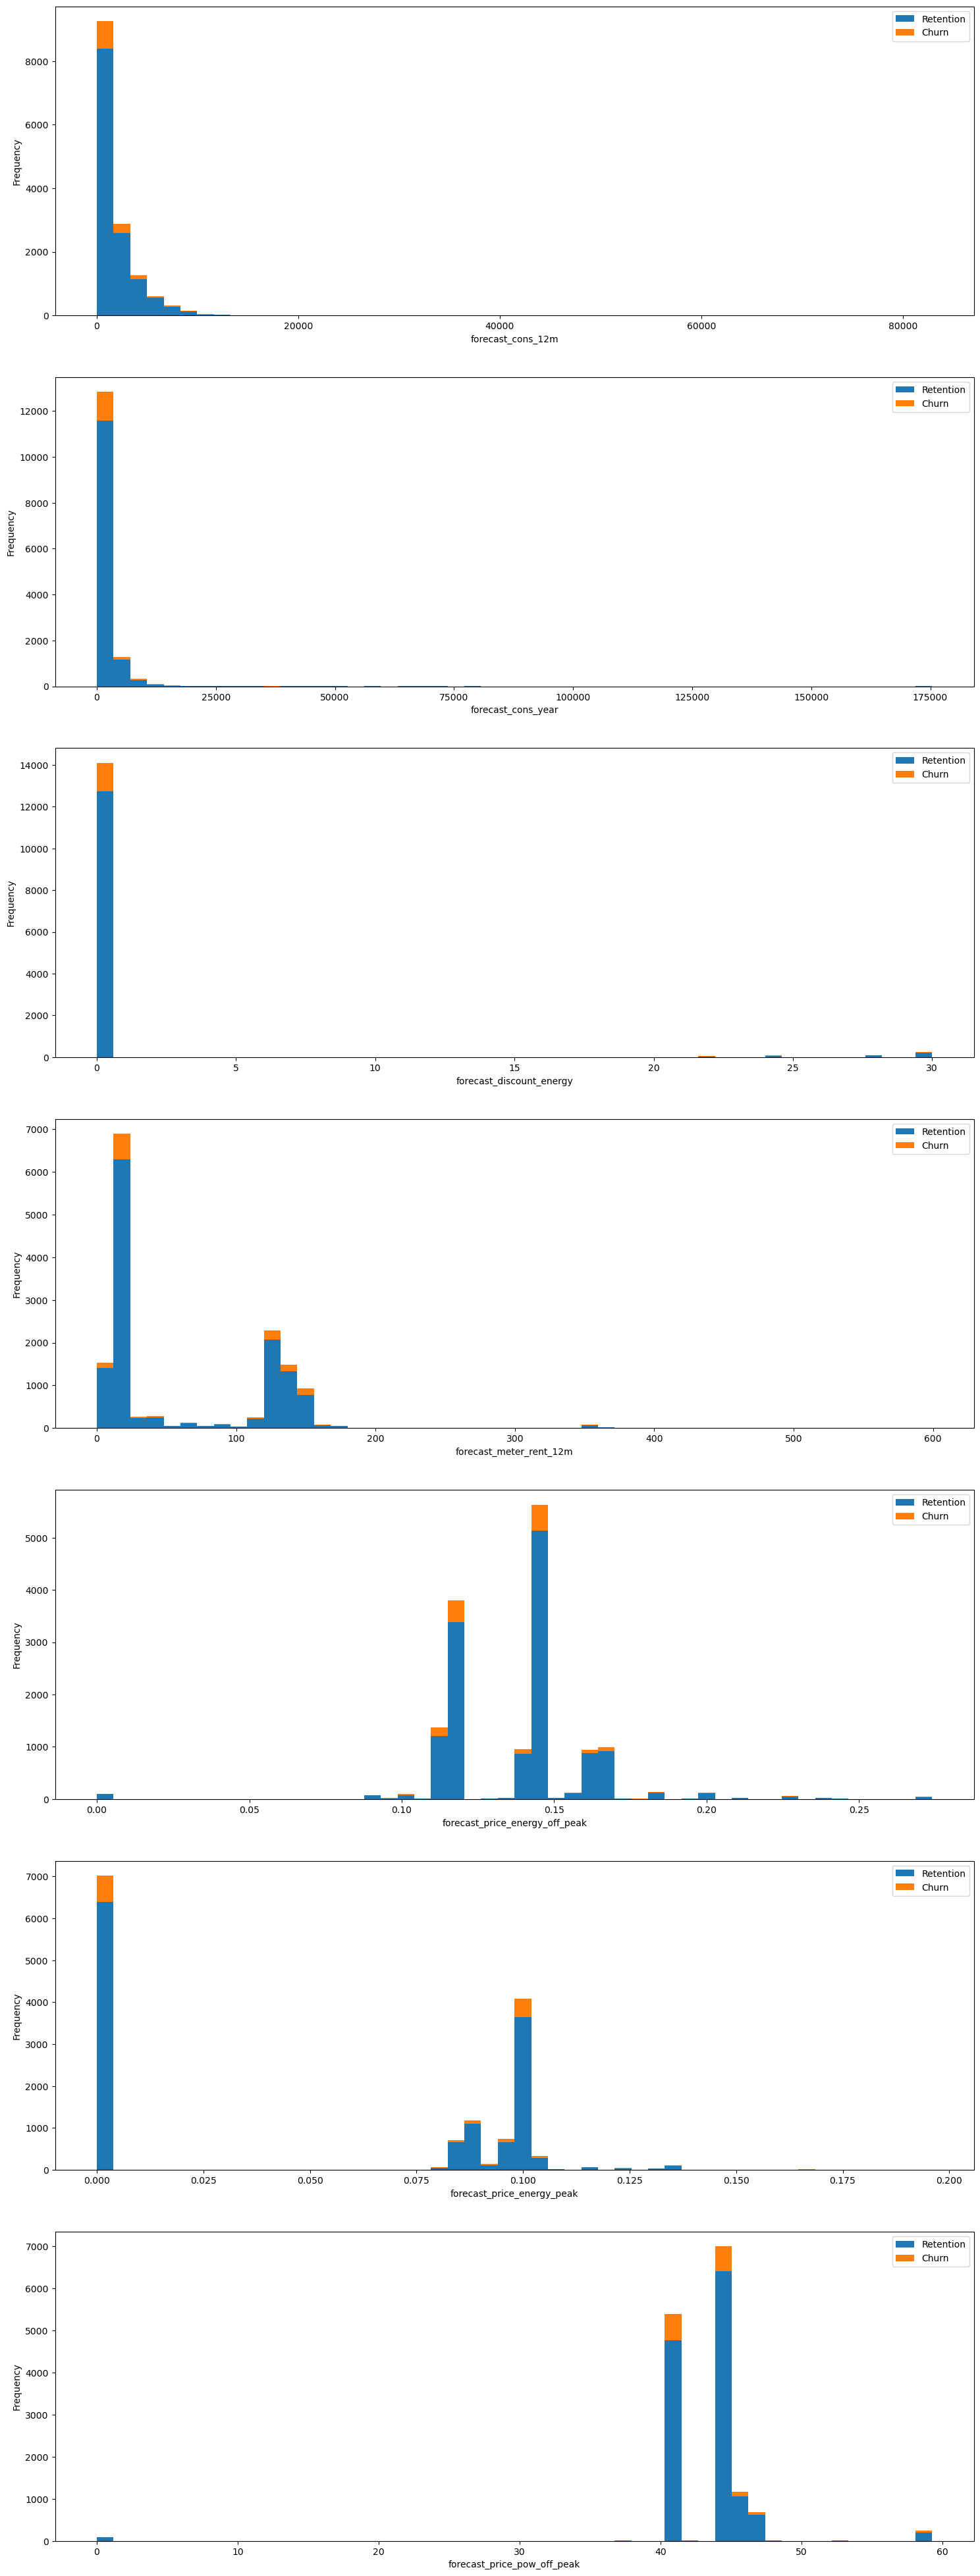

In [230]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

In forcast data lot of variables are highly positively skewed.

# Subscribed power

In [233]:
power=client_df[['id','pow_max','churn']]

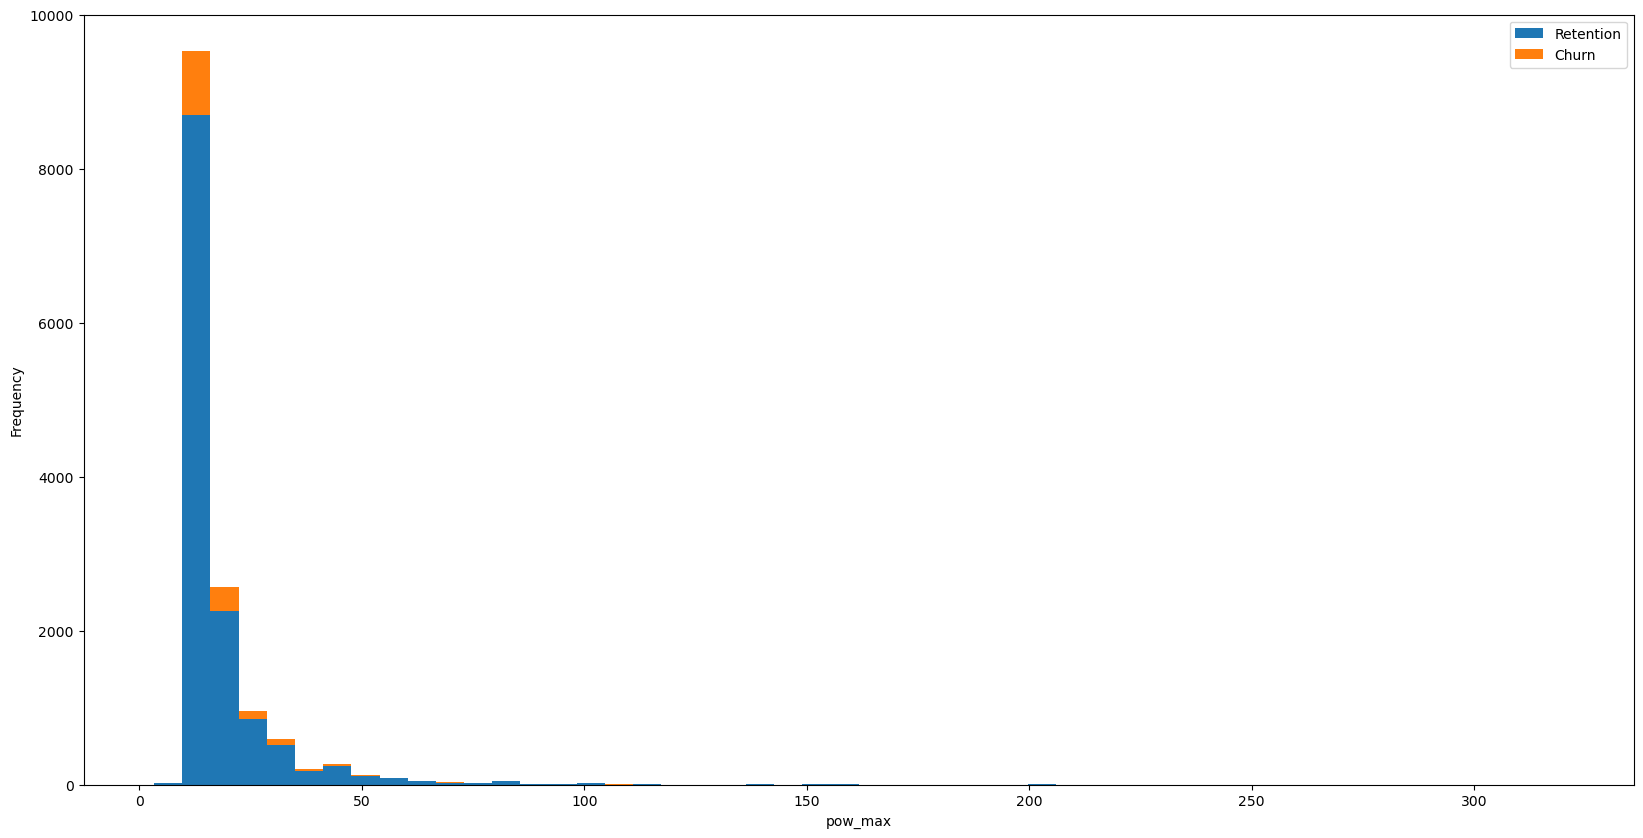

In [234]:
fig, axs=plt.subplots(nrows=1,figsize=(20,10))
plot_distribution(power,'pow_max',axs)

# Outliers Margins

In [236]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

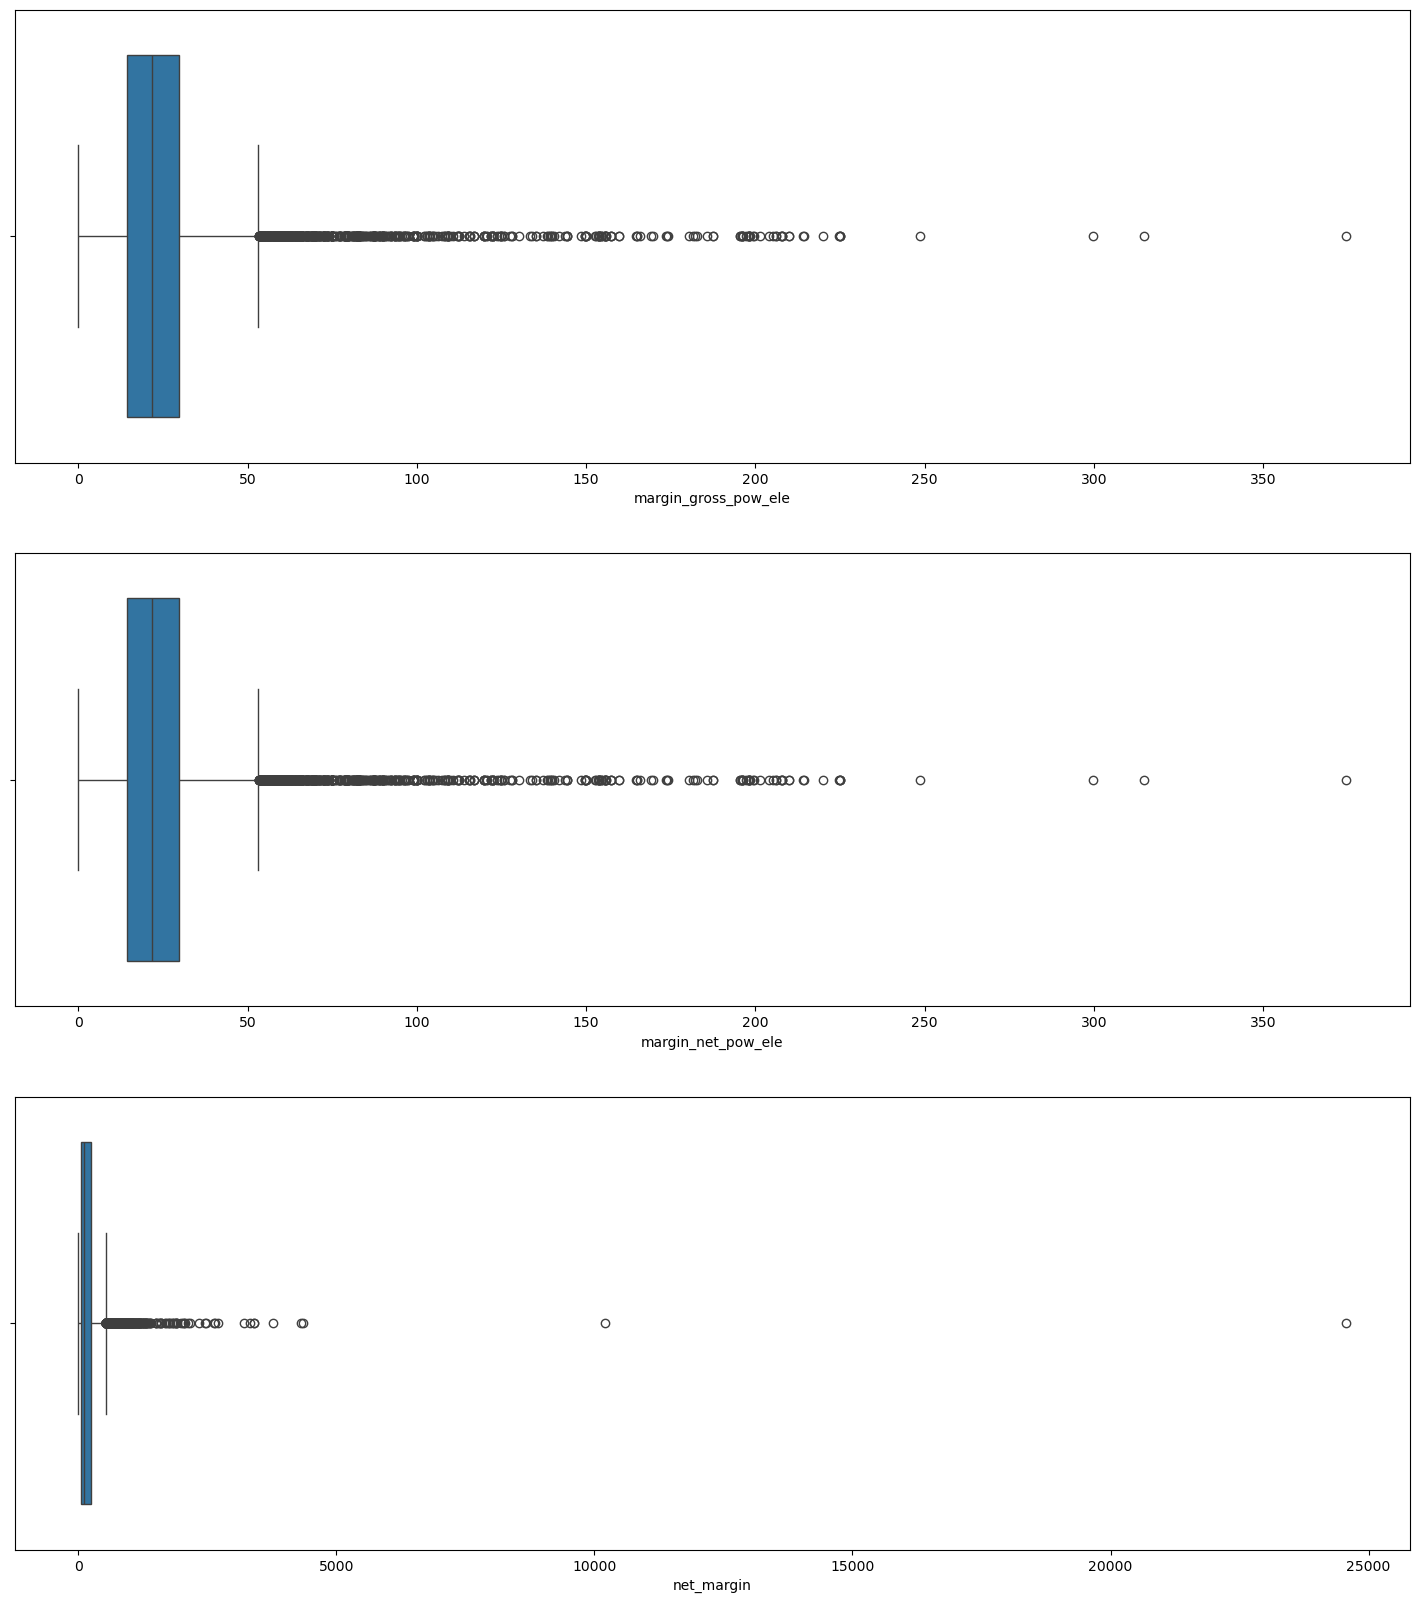

In [237]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

#plot
sns.boxplot(margin["margin_gross_pow_ele"],orient='h',ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],orient='h',ax=axs[1])
sns.boxplot(margin["net_margin"],orient='h', ax=axs[2])


plt.show()

# Contract Type

In [239]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

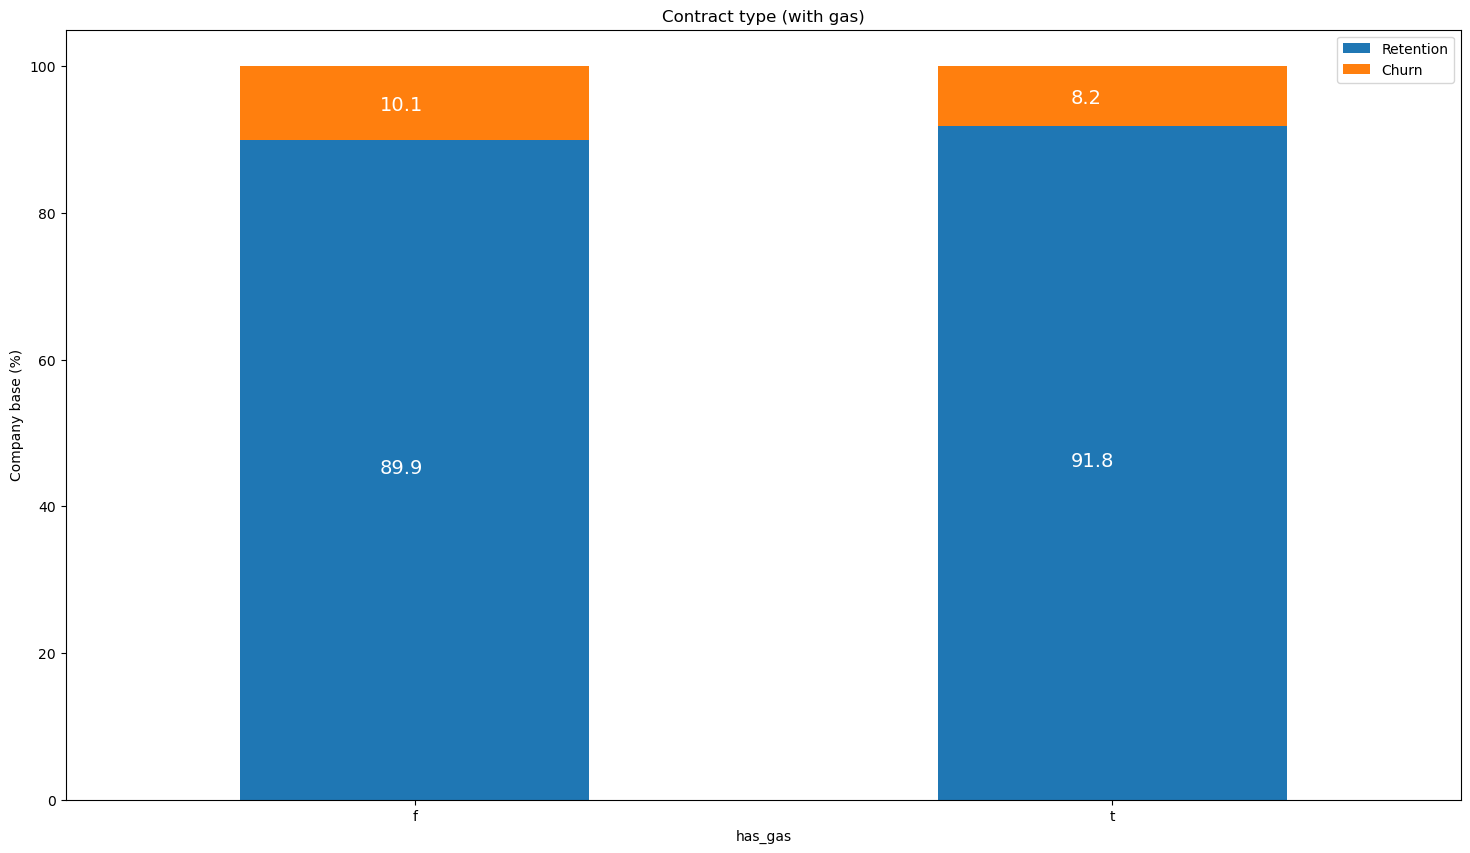

In [240]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas)')

# Feature Engineering

In [242]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [243]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.000006   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.000005   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.000015   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0             2.627605e-05                     0.000440   
1             6.089453e-04                     0.000000   
2             2.558511e-07                     0.000000   
3             0.000000e+00                     0.000000   
4             3.552481e-06                     0.000003   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   
2                     0.007662                 0.000000   
3                     0.006465                 0.000000   
4                     0.005429                 0.001954  

Price is an important factor affecting churn rate of customers.Here we just calculate the price differnce 
between the first and last month.

In [245]:
#Changing the datatype of date column
price_df = pd.read_csv('price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [246]:
# Grouping the off-peak price of companies and month
#Then calculate avg of each month of both enregy and gas
monthly_price_byID=price_df.groupby(['id','price_date']).agg({'price_off_peak_var':'mean','price_off_peak_fix':'mean'}).reset_index()


#First and last month price
jan_price=monthly_price_byID.groupby('id').first().reset_index()
dec_price=monthly_price_byID.groupby('id').last().reset_index()



In [247]:
jan_price

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1      0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3      0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4      00114d74e963e47177db89bc70108537 2015-01-01            0.149434   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-01-01            0.162720   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-01-01            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-01-01            0.153159   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-01-01            0.127566   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-01-01            0.129444   

       price_off_peak_fix  
0               40.565969  
1               44.266931  
2               44.444710  
3               40.565969  
4               44.266931  
...                   ...  
16091           41.063970  
16092           44.266931  
16093           41.063970  
16094           40.565969  
16095           40.565969  

[16096 rows x 4 columns]

In [248]:
dec_price

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1      0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3      0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4      00114d74e963e47177db89bc70108537 2015-12-01            0.145440   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-12-01            0.112488   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-12-01            0.145047   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-12-01            0.151399   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-12-01            0.118175   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

       price_off_peak_fix  
0               40.728885  
1               44.444710  
2               45.944710  
3               40.728885  
4               44.266930  
...                   ...  
16091           40.728885  
16092           44.444710  
16093           41.228885  
16094           40.728885  
16095           40.728885  

[16096 rows x 4 columns]

In [249]:
# Calculate the difference
diff = pd.merge(dec_price.rename(columns={'price_off_peak_var': 'dec_energy', 'price_off_peak_fix': 'dec_power'}), jan_price.drop(columns='price_date'), on='id')

diff['offpeak_diff_dec_january_energy'] = diff['dec_energy'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_power'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()


id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [250]:
#Merge new difference data with datafram
df=pd.merge(df,diff,on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.000006   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.000005   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.000015   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0             2.627605e-05                     0.000440   
1             6.089453e-04                     0.000000   
2             2.558511e-07                     0.000000   
3             0.000000e+00                     0.000000   
4             3.552481e-06                     0.000003   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   
2                     0.007662                 0.000000   
3                     0.006465                 0.000000   
4                     0.005429                 0.001954  

# Average Price Changes accross three periods

In [252]:
price_mean=price_df.groupby(['id']).agg({'price_off_peak_var':'mean',
                                        'price_peak_var': 'mean', 
                                        'price_mid_peak_var': 'mean',
                                        'price_off_peak_fix': 'mean',
                                        'price_peak_fix': 'mean',
                                        'price_mid_peak_fix': 'mean'}).reset_index()

In [253]:
# Calculate the mean difference between consecutive periods
price_mean['off_peak_peak_var_mean_diff'] = price_mean['price_off_peak_var'] - price_mean['price_peak_var']
price_mean['peak_mid_peak_var_mean_diff'] = price_mean['price_peak_var'] - price_mean['price_mid_peak_var']
price_mean['off_peak_mid_peak_var_mean_diff'] = price_mean['price_off_peak_var'] - price_mean['price_mid_peak_var']
price_mean['off_peak_peak_fix_mean_diff'] = price_mean['price_off_peak_fix'] - price_mean['price_peak_fix']
price_mean['peak_mid_peak_fix_mean_diff'] = price_mean['price_peak_fix'] - price_mean['price_mid_peak_fix']
price_mean['off_peak_mid_peak_fix_mean_diff'] = price_mean['price_off_peak_fix'] - price_mean['price_mid_peak_fix']

In [254]:
"""
columns=[
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
"""

"\ncolumns=[\n    'id', \n    'off_peak_peak_var_mean_diff',\n    'peak_mid_peak_var_mean_diff', \n    'off_peak_mid_peak_var_mean_diff',\n    'off_peak_peak_fix_mean_diff', \n    'peak_mid_peak_fix_mean_diff', \n    'off_peak_mid_peak_fix_mean_diff'\n]\n"

In [255]:
df=pd.merge(df,price_mean,on='id')

# Highest Price change in accross different periods and months

In [257]:
#Average price per period by company
mean_price_month=price_df.groupby(['id','price_date']).agg({
    'price_off_peak_var':'mean',
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [258]:
mean_price_month.head(20)

id price_date  price_off_peak_var  \
0   0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1   0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2   0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3   0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4   0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
5   0002203ffbb812588b632b9e628cc38d 2015-06-01            0.128067   
6   0002203ffbb812588b632b9e628cc38d 2015-07-01            0.128067   
7   0002203ffbb812588b632b9e628cc38d 2015-08-01            0.119906   
8   0002203ffbb812588b632b9e628cc38d 2015-09-01            0.119906   
9   0002203ffbb812588b632b9e628cc38d 2015-10-01            0.119906   
10  0002203ffbb812588b632b9e628cc38d 2015-11-01            0.119906   
11  0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
12  0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
13  0004351ebdd665e6ee664792efc4fd13 2015-02-01            0.148047   
14  0004351ebdd665e6ee664792efc4fd13 2015-03-01            0.148047   
15  0004351ebdd665e6ee664792efc4fd13 2015-04-01            0.148047   
16  0004351ebdd665e6ee664792efc4fd13 2015-05-01            0.148405   
17  0004351ebdd665e6ee664792efc4fd13 2015-06-01            0.148405   
18  0004351ebdd665e6ee664792efc4fd13 2015-07-01            0.148405   
19  0004351ebdd665e6ee664792efc4fd13 2015-08-01            0.143943   

    price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0         0.103975            0.070232           40.565969       24.339581   
1         0.103975            0.070232           40.565969       24.339581   
2         0.105842            0.073773           40.728885       24.437330   
3         0.105842            0.073773           40.728885       24.437330   
4         0.105842            0.073773           40.728885       24.437330   
5         0.105842            0.073773           40.728885       24.437330   
6         0.105842            0.073773           40.728885       24.437330   
7         0.101673            0.073719           40.728885       24.437330   
8         0.101673            0.073719           40.728885       24.437330   
9         0.101673            0.073719           40.728885       24.437330   
10        0.101673            0.073719           40.728885       24.437330   
11        0.101673            0.073719           40.728885       24.437330   
12        0.000000            0.000000           44.266931        0.000000   
13        0.000000            0.000000           44.266931        0.000000   
14        0.000000            0.000000           44.266931        0.000000   
15        0.000000            0.000000           44.266931        0.000000   
16        0.000000            0.000000           44.444710        0.000000   
17        0.000000            0.000000           44.444710        0.000000   
18        0.000000            0.000000           44.444710        0.000000   
19        0.000000            0.000000           44.444710        0.000000   

    price_mid_peak_fix  
0            16.226389  
1            16.226389  
2            16.291555  
3            16.291555  
4            16.291555  
5            16.291555  
6            16.291555  
7            16.291555  
8            16.291555  
9            16.291555  
10           16.291555  
11           16.291555  
12            0.000000  
13            0.000000  
14            0.000000  
15            0.000000  
16            0.000000  
17            0.000000  
18            0.000000  
19            0.000000

In [259]:
# Calculate the mean difference between consecutive periods
mean_price_month['off_peak_peak_var_mean_diff'] = mean_price_month['price_off_peak_var'] - mean_price_month['price_peak_var']
mean_price_month['peak_mid_peak_var_mean_diff'] = mean_price_month['price_peak_var'] - mean_price_month['price_mid_peak_var']
mean_price_month['off_peak_mid_peak_var_mean_diff'] = mean_price_month['price_off_peak_var'] - mean_price_month['price_mid_peak_var']
mean_price_month['off_peak_peak_fix_mean_diff'] = mean_price_month['price_off_peak_fix'] - mean_price_month['price_peak_fix']
mean_price_month['peak_mid_peak_fix_mean_diff'] = mean_price_month['price_peak_fix'] - mean_price_month['price_mid_peak_fix']
mean_price_month['off_peak_mid_peak_fix_mean_diff'] = mean_price_month['price_off_peak_fix'] - mean_price_month['price_mid_peak_fix']


In [260]:
#Highest Price among diferent periods
high_price_among_periods=mean_price_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [261]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df=pd.merge(df,high_price_among_periods[columns],on='id')

In [262]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.000006   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.000005   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.000015   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0             2.627605e-05                     0.000440   
1             6.089453e-04                     0.000000   
2             2.558511e-07                     0.000000   
3             0.000000e+00                     0.000000   
4             3.552481e-06                     0.000003   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   
2                     0.007662                 0.000000   
3                     0.006465                 0.000000   
4                     0.005429                 0.001954  

# Tenure

How long a company has been client of Powerco

In [265]:
#number of days a company has been a client
df['tenure']=((df['date_end']-df['date_activ'])/ np.timedelta64(1, 'D')).astype(int)

In [266]:
#Converting days into months
df['tenure']=df['tenure']/30
print (df['tenure'])

0        36.533333
1        85.533333
2        73.066667
3        73.066667
4        74.833333
           ...    
14601    48.166667
14602    48.700000
14603    48.666667
14604    48.700000
14605    85.200000
Name: tenure, Length: 14606, dtype: float64


In [267]:
df.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='churn',ascending=False)

churn
tenure           
111.133333    1.0
78.100000     1.0
42.533333     1.0
56.766667     1.0
40.400000     1.0
...           ...
60.733333     0.0
60.666667     0.0
60.600000     0.0
60.566667     0.0
159.833333    0.0

[1410 rows x 1 columns]

# Transforming dates into months- 
months_activ = Number of months active until reference date (Jan 2016)- 
months_to_end = Number of months of the contract left until reference date (Jan 2016- )
months_modif_prod = Number of months since last modification until reference date (Jan 201- 6)
months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [269]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'D')).astype(int)
    months=months/30
    return months

In [270]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

It is assuming that a client who has been an active client of PowerCo for a longer amount of time may have a chance to stay more. But a newer client may be more volatile. Hence the feature 'months_activ' is important one.

Mostly,the clients make the decision to churn or not in the end of contract period.In the initial time there is certain period of time to leave if not interested.Also in the middle time the company may charge certain fee to quit the contract.Because of all these end of period is an important factor.So,we consider 'months_to_end' feature

Likely, if a customer update the contract with in the contract period, it shows an intereset of client in the contract.So,we include
'months_modif_prod' feature.

The feature 'months_renewel' shows the commitment of clients in the contract.So this feature also have some importance

In [272]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.000006   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.000005   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.000015   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0             2.627605e-05                     0.000440   
1             6.089453e-04                     0.000000   
2             2.558511e-07                     0.000000   
3             0.000000e+00                     0.000000   
4             3.552481e-06                     0.000003   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   
2                     0.007662                 0.000000   
3                     0.006465                 0.000000   
4                     0.005429                 0.001954   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846         4.955073e+01   
1                     0.000000                 0.006470         6.089453e-04   
2                     0.000000                 0.007668         2.558511e-07   
3             

# Transforming Categorical Data

In [274]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'}).reset_index()

has_gas     churn
0        0  0.100544
1        1  0.081856

In [275]:
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

From the above output,we can see that tha last 3 channels have less number of occurance.So these three have
not that much importance in the prediction.So we drop these three channels.

In [277]:
df=pd.get_dummies(df,columns=['channel_sales'], prefix='channel')

In [278]:
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

In [279]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   

   var_year_price_off_peak_var  var_year_price_peak_var  \
0                     0.000061             2.627605e-05   
1                     0.000005             6.089453e-04   
2                     0.000006             2.558511e-07   
3                     0.000005             0.000000e+00   
4                     0.000015             3.552481e-06   

   var_year_price_mid_peak_var  var_year_price_off_peak_fix  \
0                     0.000440                     1.102785   
1                     0.000000                     0.006465   
2                     0.000000                     0.007662   
3                     0.000000                     0.006465   
4                     0.000003                     0.005429   

   var_year_price_peak_fix  var_year_price_mid_peak_fix  \
0                49.550703                    22.022535   
1                 0.000000                     0.000000   
2                 0.000000                     0.000000   
3                 0.000000                     0.000000   
4                 0.001954                     0.000869   

   var_year_price_off_peak  var_year_price_peak  var_year_price_mid_peak  \
0                 1.102846         4.955073e+01                22.022975   
1                 0.006470         6.089453e-04                 0.000000   
2                 0.007668         2.558511e-07                 0.000000   
3                 0.006470         0.000000e+00       

In [280]:
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Here, also last 3 catagories have only less  number of occurance.So we drop these three categories

In [282]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  var_year_price_off_peak_var  \
0                3   43.648                     0.000061   
1                6   13.800                     0.000005   
2                6   13.856                     0.000006   
3                6   13.200                     0.000005   
4                6   19.800                     0.000015   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0             2.627605e-05                     0.000440   
1             6.089453e-04                     0.000000   
2             2.558511e-07                     0.000000   
3             0.000000e+00                     0.000000   
4             3.552481e-06                     0.000003   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   
2                     0.007662                 0.000000   
3                     0.006465                 0.000000   
4                     0.005429                 0.001954   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846         4.955073e+01   
1                     0.000000                 0.006470         6.089453e-04   
2                     0.000000                 0.007668         2.558511e-07   
3                     0.000000                 0.006470         0.000000e+00   
4                     0.000869                 0.005444         1.957971e-03   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131           4.100838e-05   
1                 0.000000                   0.000003           1.217891e-03   
2                 0.000000                   0

# Transforming Numerical Data

There are skewness in the data mainly positive skewness.So, we need to treat skewness to make a better decision

In [285]:

#df['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',   'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak'].describe()

In [286]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak       has_gas      imp_cons  \
count                 14606.000000  14606.000000  14606.000000   
mean                     43.130056      0.181501    152.786896   
std                       4.485988      0.385446    341.369366   
min                       0.000000      0.000000      0.000000   
25%                      40.606701      0.000000      0.000000   
50%                      44.311378      0.000000     37.395000   
75%                      44.311378      0.000000    193.980000   
max                      59.266378      1.000000  15042.790000   

       margin_gross_pow_ele  margin_net_pow_ele   nb_prod_act    net_margin  \
count          14606.000000        14606.000000  14606.000000  14606.000000   
mean              24.565121           24.562517      1.292346    189.264522   
std               20.231172           20.230280      0.709774    311.798130   
min                0.000000            0.000000      1.000000      0.000000   
25%               14.280000           14.280000      1.000000     50.712500   
50%               21.640000           21.640000      1.000000    112.530000   
75%               29.880000           29.880000      1.000000    243.097500   
max              374.640000          374.640000     32.000000  24570.650000   

       num_years_antig       pow_max  var_year_price_off_peak_var  \
count     14606.000000  14606.000000                 14606.000000   
mean          4.997809     18.135136                     0.000041   
std           1.611749     13.534743                     0.000219   
min           1.000000      3.300000                     0.000000   
25%           4.000000     12.500000                     0.000005   
50%           5.000000     13.856000                     0.000009   
75%           6.000000     19.172500                     0.000018   
max          13.000000    320.000000                     0.004758   

       var_year_price_peak_var  var_year_price_mid_peak_var  \
count             

From the above output it shows that the columns['cons_12m', 
'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'] have high standard deviation

In [288]:
# Apply log10 transformation
# There is some values as 0,so log10 of 0 is not possible. Hence we add constant 1
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [289]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak       has_gas      imp_cons  \
count                 14606.000000  14606.000000  14606.000000   
mean                     43.130056      0.181501      1.240750   
std                       4.485988      0.385446      1.138322   
min                       0.000000      0.000000      0.000000   
25%                      40.606701      0.000000      0.000000   
50%                      44.311378      0.000000      1.584275   
75%                      44.311378      0.000000      2.289990   
max                      59.266378      1.000000      4.177357   

       margin_gross_pow_ele  margin_net_pow_ele   nb_prod_act    net_margin  \
count          14606.000000        14606.000000  14606.000000  14606.000000   
mean              24.565121           24.562517      1.292346    189.264522   
std               20.231172           20.230280      0.709774    311.798130   
min                0.000000            0.000000      1.000000      0.000000   
25%               14.280000           14.280000      1.000000     50.712500   
50%               21.640000           21.640000      1.000000    112.530000   
75%               29.880000           29.880000      1.000000    243.097500   
max              374.640000          374.640000     32.000000  24570.650000   

       num_years_antig       pow_max  var_year_price_off_peak_var  \
count     14606.000000  14606.000000                 14606.000000   
mean          4.997809     18.135136                     0.000041   
std           1.611749     13.534743                     0.000219   
min           1.000000      3.300000                     0.000000   
25%           4.000000     12.500000                     0.000005   
50%           5.000000     13.856000                     0.000009   
75%           6.000000     19.172500                     0.000018   
max          13.000000    320.000000                     0.004758   

       var_year_price_peak_var  var_year_price_mid_peak_var  \
count             

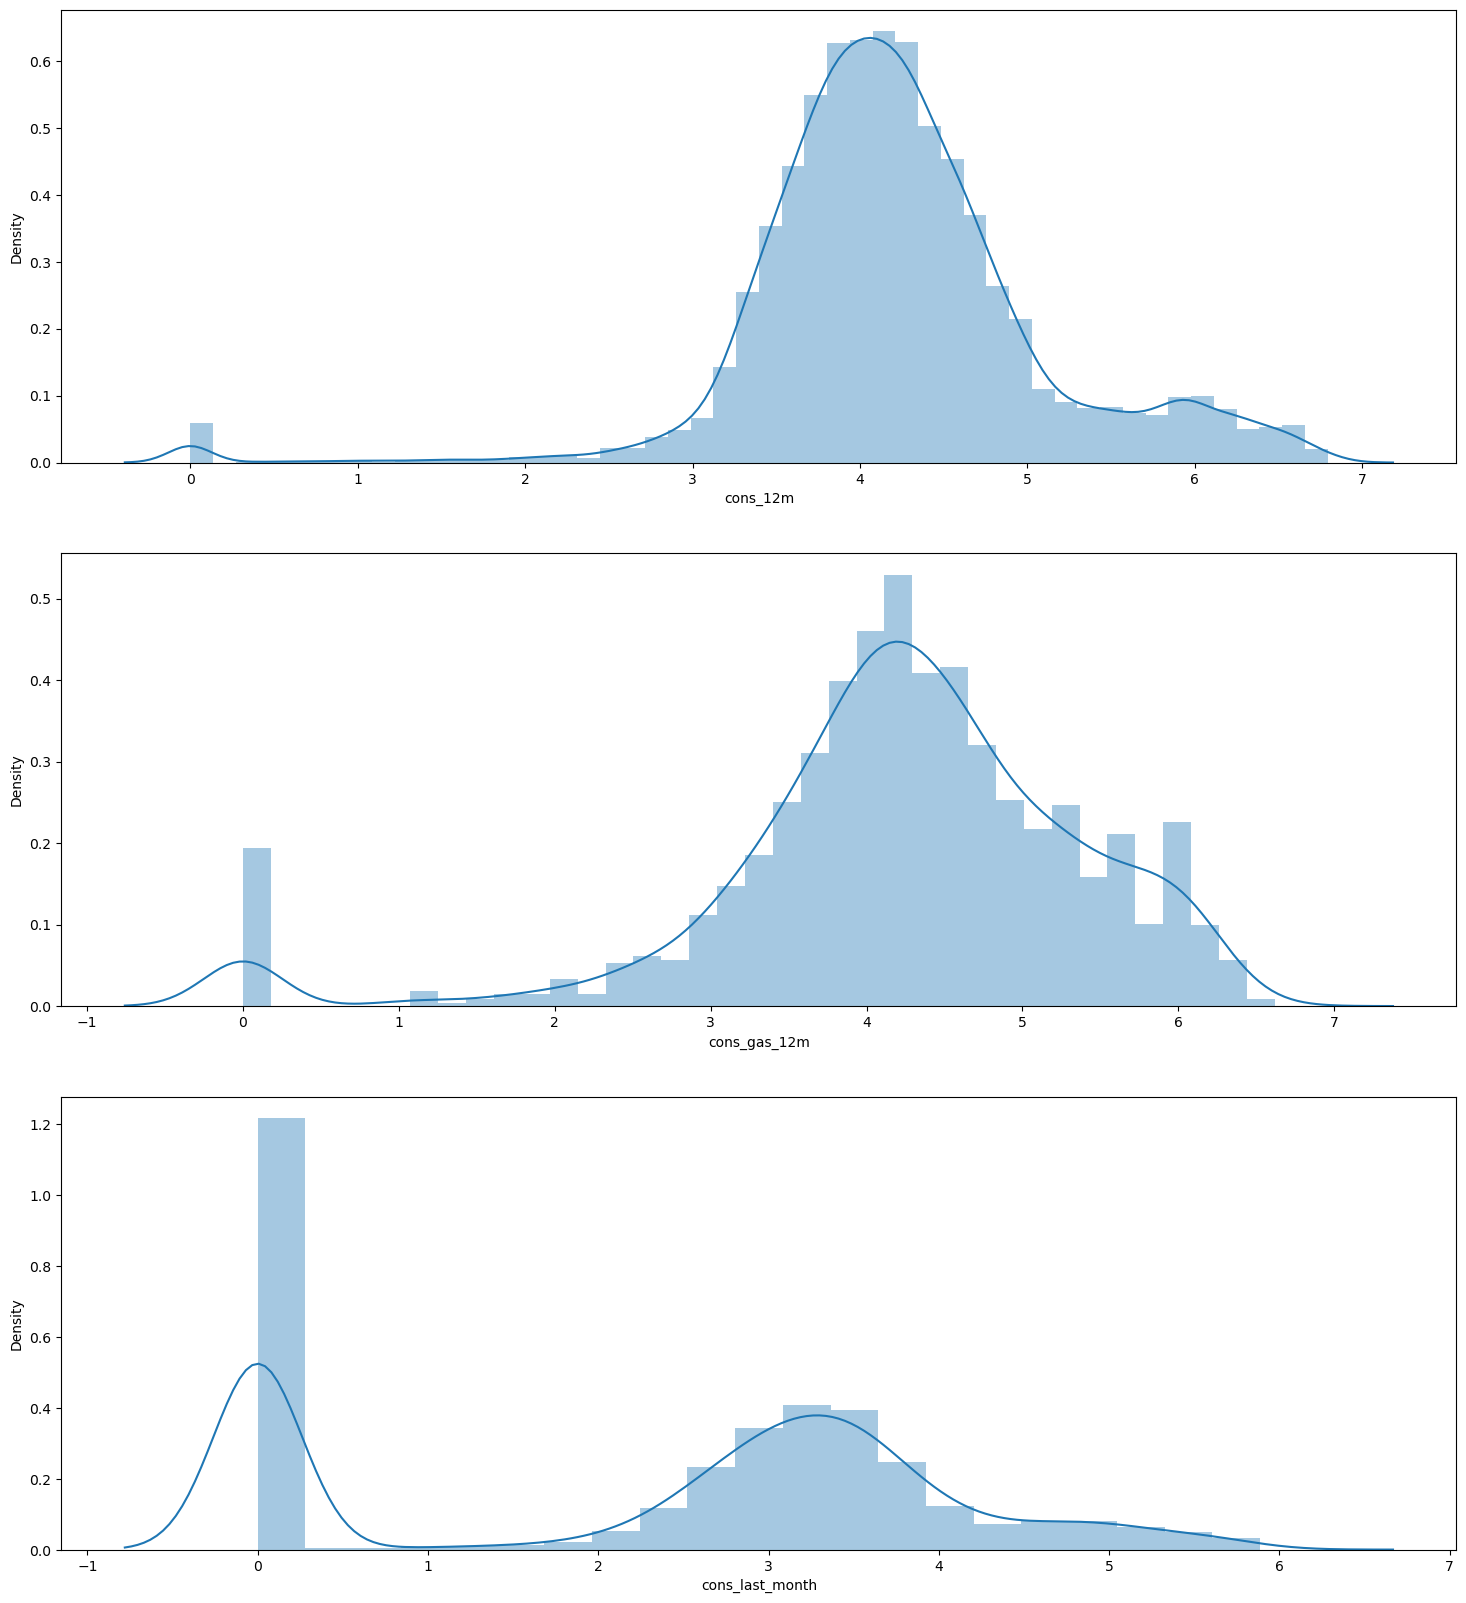

In [290]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

After tranformation ,the data shows almost near to normal distribution

# Correlation

In [293]:
#df_dropid=pd.DataFrame(df)

In [294]:
df_dropid=df.drop('id',axis=1)

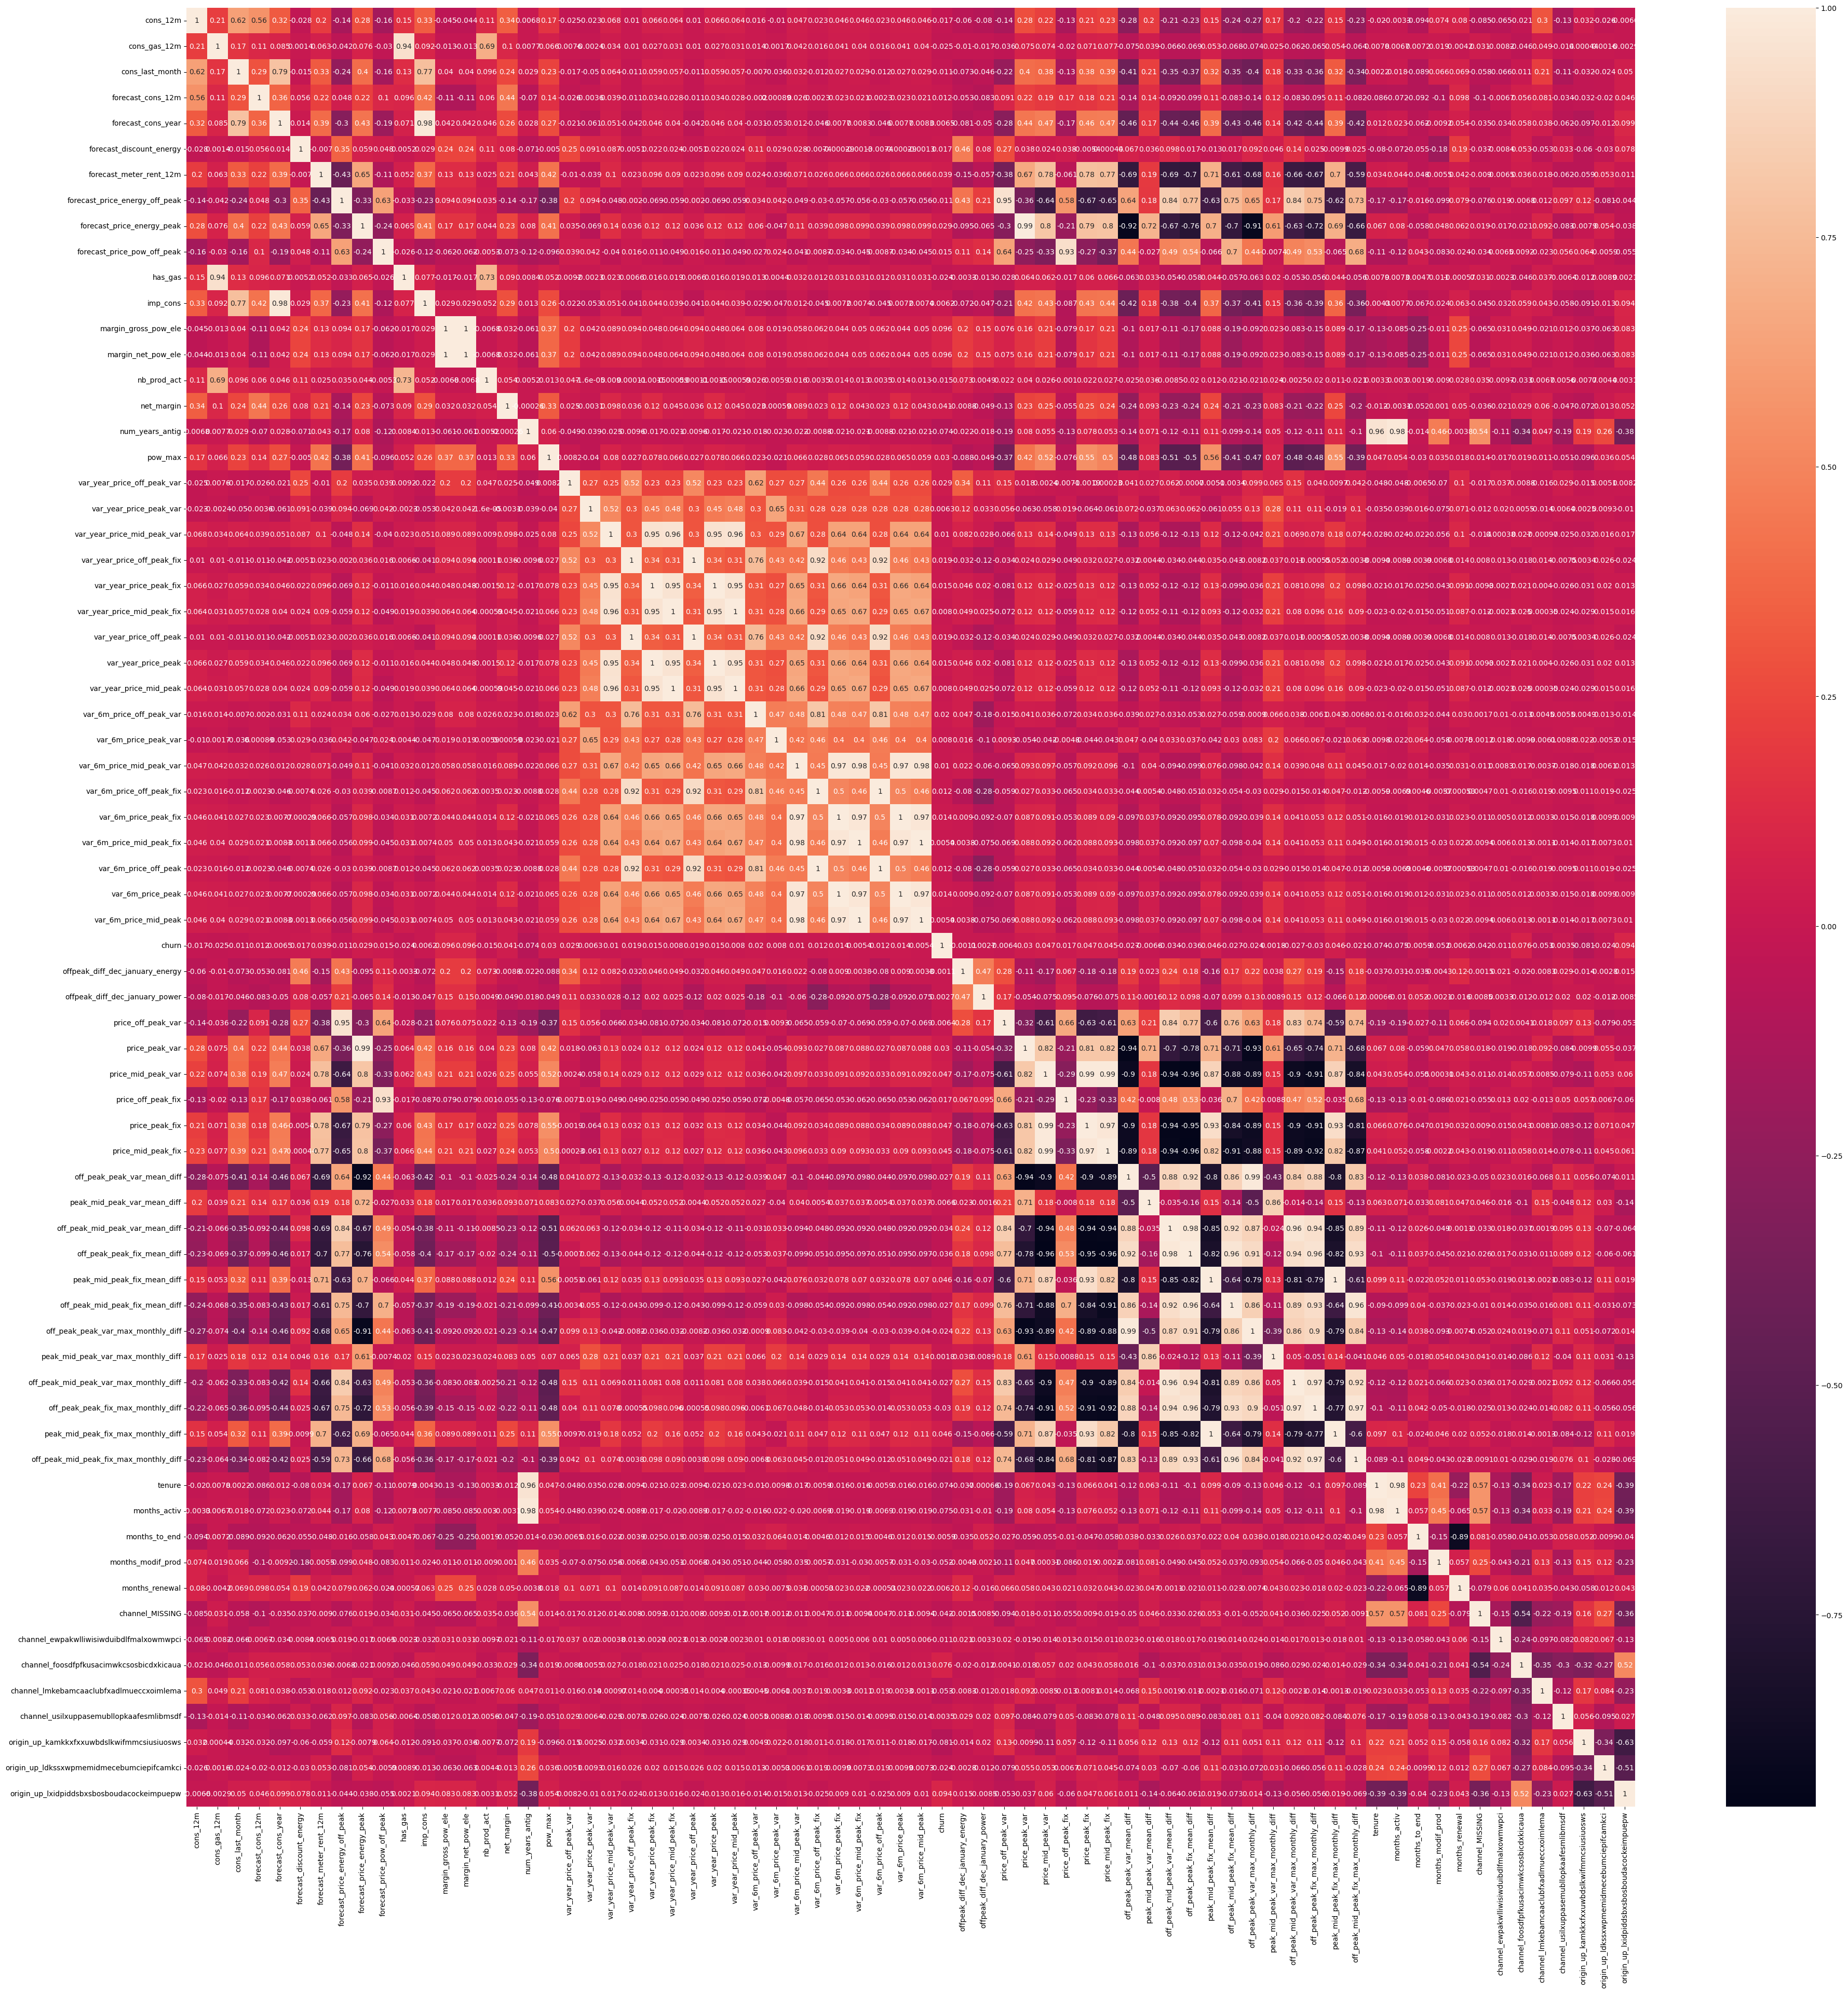

In [295]:
plt.figure(figsize=(45, 45))
sns.heatmap(df_dropid.corr(),annot=True)
plt.show()

In [296]:
#Dropping highly correlated columns
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   
2               28.60            1        6.60   13.856   
3               30.22            1       25.46   13.200   
4               44.91            1       47.98   19.800   

   var_year_price_off_peak_var  var_year_price_peak_var  \
0                     0.000061             2.627605e-05   
1                     0.000005             6.089453e-04   
2                     0.000006             2.558511e-07   
3                     0.000005             0.000000e+00   
4                     0.000015             3.552481e-06   

   var_year_price_mid_peak_var  var_year_price_off_peak_fix  \
0                     0.000440                     1.102785   
1                     0.000000                     0.006465   
2                     0.000000                     0.007662   
3                     0.000000                     0.006465   
4                     0.000003                     0.005429   

   var_year_price_peak_fix  var_year_price_mid_peak_fix  \
0                49.550703                    22.022535   
1                 0.000000                     0.000000   
2                 0.000000                     0.000000   
3                 0.000000                     0.000000   
4                 0.001954                     0.000869   

   var_year_price_off_peak  var_year_price_peak  var_year_price_mid_peak  \
0                 1.102846         4.955073e+01                22.022975   
1                 0.006470         6.089453e-04                 0.000000   
2                 0.007668         2.558511e-07                 0.000000   
3                 0.006470         0.000000e+00                 0.000000   
4                 0.005444         1.957971e-03                 0.000871   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_va

# Modelling

In [421]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [299]:
df=pd.read_csv('data_for_predictions.csv',index_col=0)

In [300]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   
2               28.60            1        6.60   13.856   
3               30.22            1       25.46   13.200   
4               44.91            1       47.98   19.800   

   var_year_price_off_peak_var  var_year_price_peak_var  \
0                     0.000061             2.627605e-05   
1                     0.000005             6.089453e-04   
2                     0.000006             2.558511e-07   
3                     0.000005             0.000000e+00   
4                     0.000015             3.552481e-06   

   var_year_price_mid_peak_var  var_year_price_off_peak_fix  \
0                     0.000440                     1.102785   
1                     0.000000                     0.006465   
2                     0.000000                     0.007662   
3                     0.000000                     0.006465   
4                     0.000003                     0.005429   

   var_year_price_peak_fix  var_year_price_mid_peak_fix  \
0                49.550703                    22.022535   
1                 0.000000                     0.000000   
2                 0.000000                     0.000000   
3                 0.000000                     0.000000   
4                 0.001954                     0.000869   

   var_year_price_off_peak  var_year_price_peak  var_year_price_mid_peak  \
0                 1.102846         4.955073e+01                22.022975   
1                 0.006470         6.089453e-04                 0.000000   
2                 0.007668         2.558511e-07                 0.000000   
3                 0.006470         0.000000e+00                 0.000000   
4                 0.005444         1.957971e-03                 0.000871   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_va

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  float64
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas        

In [302]:
y=df['churn']
x=df.drop(columns=['id','churn'],axis=1)

In [303]:
print (x.shape)
print (y.shape)

(14606, 61)
(14606,)


In [304]:
#Training Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [305]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [306]:
RF_classifier=RandomForestClassifier()
RF_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [307]:
y_pred=RF_classifier.predict(x_test)

In [308]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test,y_pred).ravel()

In [310]:
print("True Postives:",tp)
print("False Positives:",fp)
print("True Negetives:",tn)
print("False Negetives:",fn,"\n")


print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

y_test.value_counts()

True Postives: 20
False Positives: 4
True Negetives: 3282
False Negetives: 346 

Accuracy: 0.9041621029572837
Precision: 0.8333333333333334
Recall: 0.0546448087431694


churn
0    3286
1     366
Name: count, dtype: int64

In [311]:
print (metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652



From the above output although the model gives an accuracy of 90% ,the recall shows a low score.Because of this there is a chance of misleading in the accuracy score.So,It is important to perform some more feature engineering to improve the recall score.

# Hyperparameter Tuning

In [314]:
from sklearn.model_selection import RandomizedSearchCV
"""
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

#Dictionary for hyperparameters
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

RF_classifier_Tuning=RandomForestClassifier(random_state=42)# model object

RF_cv=RandomizedSearchCV(estimator=RF_classifier_Tuning,scoring='f1',param_distributions=random_grid,n_iter=200,cv=2,
                         verbose=3,random_state=42,n_jobs=1)
"""                         

"\nn_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]\nmax_features=['auto','sqrt']\nmax_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]\nmin_samples_split=[2,5,10]\nmin_samples_leaf=[1,2,4]\nbootstrap=[True,False]\n\n#Dictionary for hyperparameters\nrandom_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,\n             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}\n\nRF_classifier_Tuning=RandomForestClassifier(random_state=42)# model object\n\nRF_cv=RandomizedSearchCV(estimator=RF_classifier_Tuning,scoring='f1',param_distributions=random_grid,n_iter=200,cv=2,\n                         verbose=3,random_state=42,n_jobs=1)\n"

In [315]:
#RF_cv.fit(x_train,y_train)

In [316]:
#RF_best_params=RF_cv.best_params_
#print(f"Best Parameters:{RF_best_params})")

In [317]:
RF_classifier2=RandomForestClassifier(n_estimators= 200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False)
RF_classifier2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200)

In [419]:
y_pred2=RF_classifier2.predict(x_test)

In [423]:
report=metrics.classification_report(y_test,y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3286
           1       0.67      0.09      0.15       366

    accuracy                           0.90      3652
   macro avg       0.79      0.54      0.55      3652
weighted avg       0.88      0.90      0.87      3652



# Feature Importance

It indicates the important of a feature within the predictive model

In [429]:
feature_importance=pd.DataFrame({
    'feature' : x_train.columns,
    'importance':RF_classifier.feature_importances_}).sort_values(by='importance',ascending=True).reset_index()

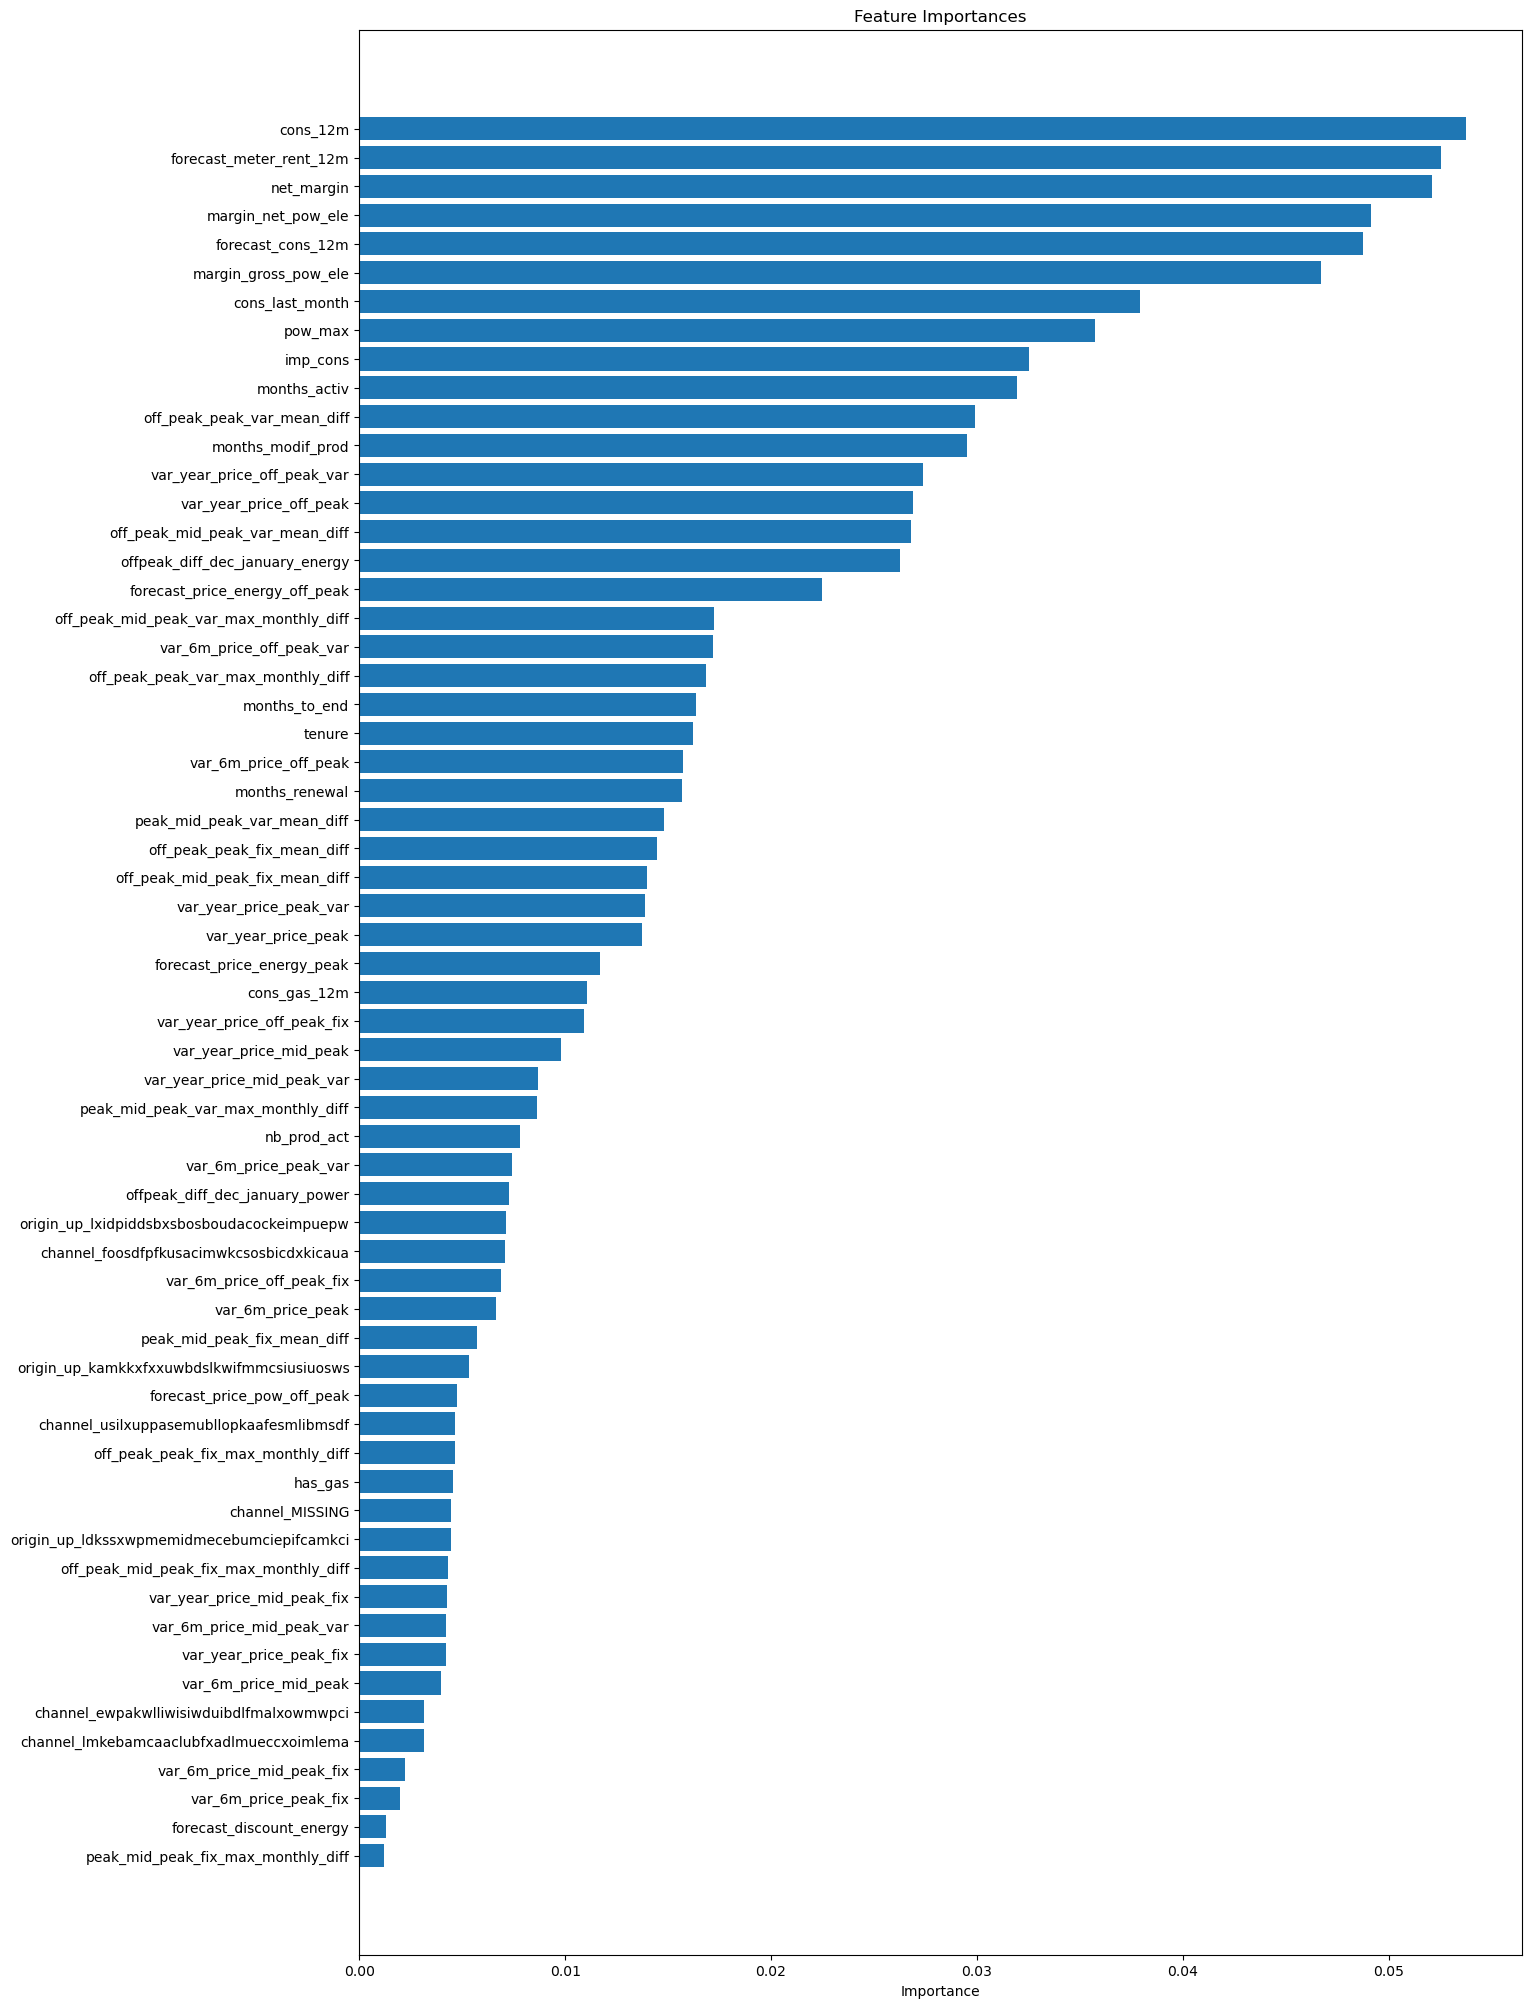

In [437]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importance)), feature_importance['importance'], align='center')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:-    -
Net margin and consumption over 12 months is a top driver for churn in this mol-    -l
Margin on power subscription also is an influential d    ri
-Our price sensitivity features are scattered around but are not the main driver for a customer churning